## Métodos de Otimização: Métodos de procura multidimensional

### Método de Quasi-Newton (BFGS)

__Imports:__

In [1]:
from mpl_toolkits import mplot3d
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sys, os

__Incialização:__

In [2]:
x =np.zeros(2 , dtype = 'float')

__Função Avaliada:__

In [3]:
def f(x):
    f = open("var.dat", "w")
    f.write("2\n")
    f.write(str(x[0])+'\n')
    f.write(str(x[1]))
    f.close()
    
    result = os.system("funcao.exe")
    
    f = open("obj.dat", "r")
    u = float(f.read())
    f.close()
    return u

In [4]:
def f2(x, y):
    return 0.25*x**4-3.*x**3+11.*x**2-13.*x+0.25*y**4-3.*y**3+11.*y**2-13.*y

x1 = np.linspace(0, 6)
x2 = np.linspace(0, 6)

X1, X2 = np.meshgrid(x1, x2)
Z = f2(X1, X2)

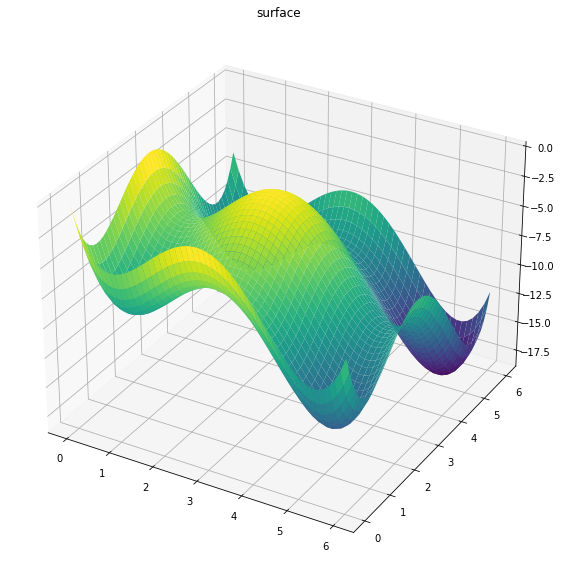

In [5]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

__Método:__

In [6]:
def grad(x):
    G=np.zeros(2, dtype='float')
    G[0] = x[0]**3 -9.*x[0]**2 +22.*x[0] - 13.
    G[1] = x[1]**3 -9.*x[1]**2 +22.*x[1] - 13.
    return G

In [11]:
Hinv=np.zeros((2,2), dtype='float')
G=np.zeros(2, dtype='float')
Gold=np.zeros(2, dtype='float')
xnew=np.zeros(2, dtype='float')
xold=np.zeros(2, dtype='float')
layout = "{0:.5f}"
tol = -1e-10

#chute incial:
x1 = 4
x2 = 2

alpha=0.1; kmax=20; k=0
xold[0]=x1; xold[1]=x2; F0 = f(xold)
print(layout.format(xold[0])+" "+layout.format(xold[1])+" "+layout.format(F0))

# Primeira iteração k=0

# Calculo Gradiente
G = grad(xold)

# Aproximação da inversa do Hessiano (Newton)
Hinv[0,0]=1.
Hinv[1,1]=1.

#Calculo da direção
d = -np.matmul(Hinv,G)

# Processo iterativo
xnew=xold+alpha*d

#Atualiza xold
xold = xnew.copy()

#Calculo da função
F = f(xnew)
print(layout.format(xnew[0])+" "+layout.format(xnew[1])+" "+layout.format(F))

while k < kmax:
    k += 1
    
    Gold = G.copy()
    # Calculo Gradiente
    G = grad(xold)

    #Calculo de Y
    Y = G-Gold

    #Calculo matriz M
    M = (1.+np.dot(Y,np.matmul(Hinv,Y))/np.dot(Y,d))*np.outer(d,d)/np.dot(d,Y)

    #Calculo matriz N
    N = -(np.matmul(np.outer(d,Y),Hinv)+np.outer(np.matmul(Hinv,Y),d))/np.dot(Y,d)

    # Aproximação da inversa do Hessiano
    Hinv = Hinv+M+N

    #Calculo da direção
    d = -np.matmul(Hinv,G)

    # Processo iterativo
    xnew=xold+alpha*d
    
    if max(d) == 0:
        k=kmax

    #Atualiza xold
    xold = xnew.copy()

    F = f(xnew)
    print(layout.format(xnew[0])+" "+layout.format(xnew[1])+" "+layout.format(F))

4.00000 2.00000 -6.00000
4.50000 1.70000 -9.57035
-6.58305 8.85518 2089.17699
4.53392 1.38683 -10.73175
4.57413 1.12203 -11.56329
4.77699 0.53235 -12.16416
4.84293 0.78052 -12.97919
5.12939 0.91272 -13.88444
5.38742 0.92844 -14.06789
5.32138 0.89183 -14.09824
5.32713 0.87748 -14.10021
5.33006 0.87149 -14.10041
5.33006 0.87158 -14.10041
5.33006 0.87158 -14.10041
5.33006 0.87158 -14.10041
5.33006 0.87158 -14.10041
5.33006 0.87158 -14.10041
5.33006 0.87158 -14.10041
5.33006 0.87158 -14.10041


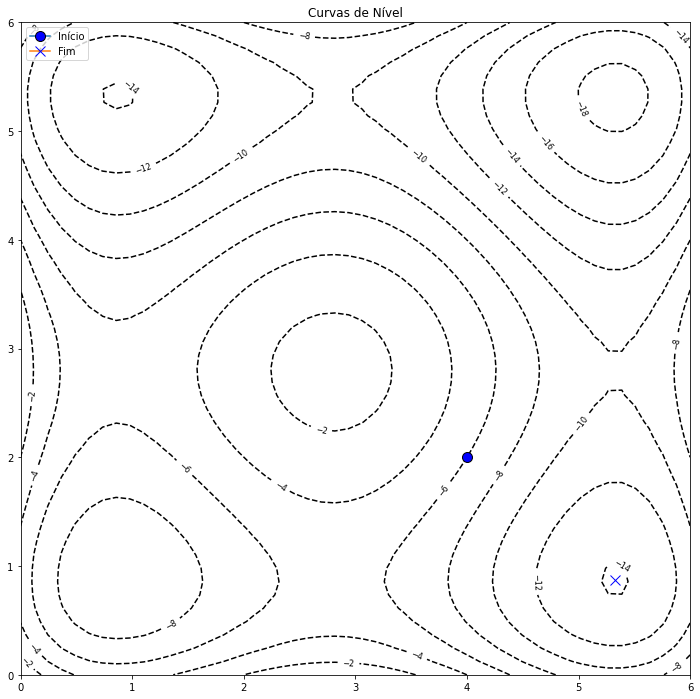

In [12]:
plt.figure(figsize=(12,12))
CS = plt.contour(X1, X2, Z,10,colors='k')
plt.clabel(CS, inline=0.5, fontsize=8)
plt.title('Curvas de Nível')
plt.plot(x1, x2, marker="o", markersize=10, markeredgecolor="k", markerfacecolor="b")
plt.plot(xnew[0], xnew[1], marker="x", markersize=10, markeredgecolor="b", markerfacecolor="b")
plt.legend(['Início', 'Fim'], loc='upper left')
plt.show()